In [1]:
import nltk

In [2]:
# exercise2
nltk.download('gutenberg')
from nltk.corpus import gutenberg
persuasion = gutenberg.words('austen-persuasion.txt')
num_word_tokens = len(persuasion)
num_word_types = len(set(persuasion))
print(num_word_tokens, num_word_types)

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/binxie/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


98171 6132


[nltk_data] Downloading package state_union to
[nltk_data]     /Users/binxie/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


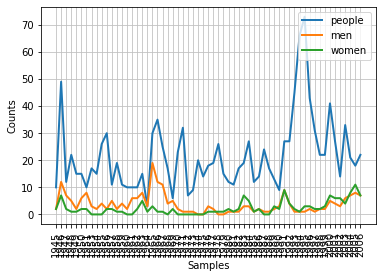

In [4]:
# exercise4
nltk.download('state_union')
from nltk.corpus import state_union
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower() == target)
cfd.plot()
# The word "people" has rapid increasement during 1945-1946 and 1990-1995. 
# The word "men" and "women" keep stable in whole over time.

In [8]:
# exercise6
# Problem: Some words may be spelled the same in German and Spanish with different translations in English. 
# Solution: Add another unique token to the words
nltk.download('swadesh')
from nltk.corpus import swadesh
de2en = [(de + '_de', en) for (de, en) in swadesh.entries(['de', 'en'])]
es2en = [(es + '_es', en) for (es, en) in swadesh.entries(['es', 'en'])]
translate = dict(de2en)
translate.update(dict(es2en))
print(translate['Hund_de'], translate['perro_es'])

dog dog


[nltk_data] Downloading package swadesh to /Users/binxie/nltk_data...
[nltk_data]   Package swadesh is already up-to-date!


[nltk_data] Downloading package names to /Users/binxie/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


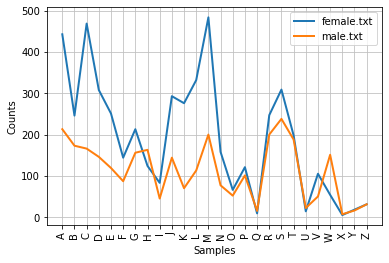

In [11]:
# exercise8
nltk.download('names')
from nltk.corpus import names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

In [5]:
# exercise10
nltk.download('brown')
from nltk.corpus import brown
news = brown.words('ca16')
hobbies = brown.words('ce36')
fiction = brown.words('ck14')

def find_third_of_all_words(text):
    words_list = []
    fdist = nltk.FreqDist([w.lower() for w in text if w.isalpha()])
    most = fdist.most_common(int(len(text) / 3))
    count = 0
    for word, freq in most:
        if count < (len(text) / 3):
            words_list.append(word)
            count += freq
    print(words_list)

[nltk_data] Downloading package brown to /Users/binxie/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [18]:
find_third_of_all_words(news)

['the', 'of', 'and', 'in', 'a', 'to', 'will', 'for', 'is', 'be', 'at', 'his', 'her', 'with', 'from', 'new', 'here', 'who', 'as', 'on', 'their', 'has', 'back', 'he', 'tomorrow', 'chicago', 'this', 'an', 'club', 'when', 'wendell', 'are', 'that', 'monroe', 'only', 'give', 'wedding', 'met', 'now', 'miss', 'but', 'more', 'up', 'forest', 'home', 'brother', 'also', 'trip', 'board', 'night', 'last', 'was', 'john', 'one', 'there', 'geraghty', 'day', 'world', 'international']


In [19]:
find_third_of_all_words(hobbies)

['the', 'a', 'and', 'to', 'you', 'in', 'of', 'for', 'is', 'are', 'car', 'or', 'will', 'your', 'as', 'it', 'at', 'day', 'there', 'be']


In [20]:
find_third_of_all_words(fiction)

['the', 'to', 'he', 'of', 'a', 'his', 'in', 'was', 'and', 'with', 'would', 'had', 'him', 'be', 'on', 'michelangelo', 'that', 'for', 'at', 'not', 'as', 'her', 'argiento', 'mary', 'could', 'they', 'when', 'or']


In [21]:
# From the results, we can conclude that BBC's statistic is true. 
# Words like "the", "a", "and", "of", "is", "are" and etc account for around the third of all words.

In [10]:
# exercise12
nltk.download('cmudict')
entries = nltk.corpus.cmudict.entries()

entry_dict = {}
for entry in entries:
    entry_dict[entry[0]] = entry_dict.get(entry[0], 0) + 1
    
dictinct_words = len(entry_dict);
more_pronunciations = 0;
for count in entry_dict.values():
    if count > 1:
        more_pronunciations += 1
more_pronunciations_fraction = (more_pronunciations / dictinct_words) * 100

print('Distinct words: ' + str(dictinct_words))
print('Fraction of words with more than one pronunciation: ' + str(more_pronunciations_fraction) + '%')

[nltk_data] Downloading package cmudict to /Users/binxie/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Distinct words: 123455
Fraction of words with more than one pronunciation: 7.485318537118789%


In [39]:
# exercise14
def supergloss(s):
    gloss = 'definition: ' + s.definition() + '\n'
    gloss += 'Hypernyms:\n'
    for hypernym in s.hypernyms():
        gloss += hypernym.name() + ': ' + hypernym.definition() + '\n'
    gloss += 'Hyponyms:\n'
    for hyponym in s.hyponyms():
        gloss += hyponym.name() + ': ' + hyponym.definition() + '\n'
    return gloss

nltk.download('wordnet')
from nltk.corpus import wordnet as wn
car = supergloss(wn.synset('car.n.01'))
print(car)

definition: a motor vehicle with four wheels; usually propelled by an internal combustion engine
Hypernyms:
motor_vehicle.n.01: a self-propelled wheeled vehicle that does not run on rails
Hyponyms:
ambulance.n.01: a vehicle that takes people to and from hospitals
beach_wagon.n.01: a car that has a long body and rear door with space behind rear seat
bus.n.04: a car that is old and unreliable
cab.n.03: a car driven by a person whose job is to take passengers where they want to go in exchange for money
compact.n.03: a small and economical car
convertible.n.01: a car that has top that can be folded or removed
coupe.n.01: a car with two doors and front seats and a luggage compartment
cruiser.n.01: a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
electric.n.01: a car that is powered by electricity
gas_guzzler.n.01: a car with relatively low fuel efficiency
hardtop.n.01: a car that resembles a convertible but has a fixed rigid top
hatch

[nltk_data] Downloading package wordnet to /Users/binxie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
# exercise16
def generate_diversity_scores(text):
    score = len(text) / len(set(text))
    return score

for genre in nltk.corpus.brown.categories():
    score = generate_diversity_scores(brown.words(categories=genre))
    print(genre + ': ' + str(score))

adventure: 7.814063556457065
belles_lettres: 9.396666847619565
editorial: 6.22891809908999
fiction: 7.362717695119329
government: 8.570712626818237
hobbies: 6.899455383326351
humor: 4.324297388877816
learned: 10.788777507562726
lore: 7.60525408536165
mystery: 8.188054998567745
news: 6.98582742809504
religion: 6.182174799937235
reviews: 4.718757245536749
romance: 8.284666351159489
science_fiction: 4.475719146303742


In [41]:
# humor has the lowest diversity. 
# It's out of my expectation. I thought the genre like "science_fiction" may have the high diversity. However, its diversity is low. 

In [43]:
# exercise18
nltk.download('stopwords')

def most_frequent_bigrams_50(text):
    stopwords = nltk.corpus.stopwords.words('english')
    new_text = [word for word in text if word.isalpha() and word not in stopwords]
    bigrams = nltk.bigrams(new_text)
    fdist = nltk.FreqDist(bigrams)
    most = fdist.most_common(50)
    return [bigram for bigram, count in most]

print(most_frequent_bigrams_50(brown.words(categories='adventure')))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/binxie/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('I', 'could'), ('I', 'know'), ('could', 'see'), ('I', 'said'), ('I', 'saw'), ('The', 'man'), ('I', 'think'), ('Miss', 'Langford'), ('The', 'girl'), ('He', 'said'), ('The', 'marine'), ('said', 'I'), ('I', 'want'), ('two', 'men'), ('I', 'heard'), ('shook', 'head'), ('Mary', 'Jane'), ('Blue', 'Throat'), ('know', 'I'), ('I', 'felt'), ('He', 'asked'), ('I', 'guess'), ('I', 'mean'), ('years', 'ago'), ('said', 'He'), ('He', 'looked'), ('This', 'time'), ('long', 'time'), ('I', 'thought'), ('I', 'would'), ('I', 'got'), ('big', 'man'), ('She', 'said'), ('let', 'go'), ('He', 'knew'), ('I', 'never'), ('All', 'right'), ('could', 'hear'), ('And', 'I'), ('He', 'took'), ('Billy', 'Tilghman'), ('could', 'get'), ('get', 'back'), ('He', 'found'), ('He', 'could'), ('would', 'go'), ('I', 'see'), ('Gray', 'Eyes'), ('time', 'I'), ('At', 'first')]


In [45]:
# exercise20
def word_freq(word, genre):
    fdist = nltk.FreqDist(brown.words(categories=genre))
    return fdist[word]

print(word_freq('I', 'adventure'))

652


In [51]:
# exercise22
def hedge(text):
    i = 3
    while i < len(text):
        text.insert(i, 'like')
        i += 4
    return text

print(hedge(['CS4803', 'Language', 'and', 'Computers', 'is', 'very', 'interesting']))

['CS4803', 'Language', 'and', 'like', 'Computers', 'is', 'very', 'like', 'interesting']


In [66]:
# exercise24
nltk.download('genesis')
import random

def generate_model(text, n=100, num=15):
    fdist = nltk.FreqDist(text)
    most = fdist.most_common(n)
    words = [word for word, count in most]
    random_text = ''
    for i in range(num):
        word = random.choice(words)
        random_text += (word + ' ')
        
    return random_text

[nltk_data] Downloading package genesis to /Users/binxie/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


In [67]:
print(generate_model(nltk.corpus.genesis.words('english-kjv.txt')))

out Jacob father brother God unto wife wife one wife one all man s day 


In [68]:
print(generate_model(nltk.corpus.genesis.words('english-kjv.txt')))

went Egypt your they brethren Joseph for I s Egypt before LORD by their were 


In [ ]:
# The generated text is not so intelligible. 
# Strength: This method can generate abundunt different new texts very quickly.
# Weakness: Since this method doesn't check the grammer and uses only n most likely words, most texts are wrong and meaningless.

In [74]:
print(generate_model(nltk.corpus.brown.words(categories=['fiction', 'science_fiction'])))

about about had were with : where he more himself never one do by She 


In [73]:
print(generate_model(nltk.corpus.brown.words(categories=['adventure', 'hobbies'])))

It you this one her will about man there this about : she for his 


In [75]:
# It looks like the new texts become more meaningless. 
# I think it's because that With hybrid genre, the most likely words contain more words like "you", "the", "a" and so on.

In [76]:
# exercise26
has_hyponym  = 0
hyponym_sum = 0
for synset in wn.all_synsets('n'):
    hyponyms = synset.hyponyms()
    if len(hyponyms) > 0:
        has_hyponym += 1
        hyponym_sum += len(hyponyms)
    
branching_factor = hyponym_sum / has_hyponym
print(branching_factor)

4.543820763194153


In [80]:
# exercise28
word_pairs = [('car', 'automobile'), ('gem', 'jewel'), ('journey', 'voyage'), ('boy', 'lad'), ('coast', 'shore'), 
         ('asylum', 'madhouse'), ('magician', 'wizard'), ('midday', 'noon'), ('furnace', 'stove'), ('food', 'fruit'), 
         ('bird', 'cock'), ('bird', 'crane'), ('tool', 'implement'), ('brother', 'monk'), ('lad', 'brother'), 
         ('crane', 'implement'), ('journey', 'car'), ('monk', 'oracle'), ('cemetery', 'woodland'), ('food', 'rooster'), 
         ('coast', 'hill'), ('forest', 'graveyard'), ('shore', 'woodland'), ('monk', 'slave'), ('coast', 'forest'), 
         ('lad', 'wizard'), ('chord', 'smile'), ('glass', 'magician'), ('rooster', 'voyage'), ('noon', 'string')]

similarity_list = []
for word1, word2 in word_pairs:
    similarity = wn.synsets(word1)[0].path_similarity(wn.synsets(word2)[0])
    similarity_list.append((word1, word2, similarity))
similarity_list.sort(key=lambda tup: tup[2], reverse=True)

similarity_list

[('car', 'automobile', 1.0),
 ('midday', 'noon', 1.0),
 ('coast', 'shore', 0.5),
 ('tool', 'implement', 0.5),
 ('boy', 'lad', 0.3333333333333333),
 ('journey', 'voyage', 0.25),
 ('coast', 'hill', 0.2),
 ('shore', 'woodland', 0.2),
 ('monk', 'slave', 0.2),
 ('lad', 'wizard', 0.2),
 ('magician', 'wizard', 0.16666666666666666),
 ('lad', 'brother', 0.14285714285714285),
 ('gem', 'jewel', 0.125),
 ('asylum', 'madhouse', 0.125),
 ('brother', 'monk', 0.125),
 ('monk', 'oracle', 0.125),
 ('bird', 'crane', 0.1111111111111111),
 ('cemetery', 'woodland', 0.1111111111111111),
 ('glass', 'magician', 0.1111111111111111),
 ('crane', 'implement', 0.1),
 ('food', 'fruit', 0.09090909090909091),
 ('coast', 'forest', 0.09090909090909091),
 ('chord', 'smile', 0.09090909090909091),
 ('furnace', 'stove', 0.07692307692307693),
 ('forest', 'graveyard', 0.07142857142857142),
 ('bird', 'cock', 0.0625),
 ('food', 'rooster', 0.0625),
 ('noon', 'string', 0.058823529411764705),
 ('journey', 'car', 0.05),
 ('rooster'

In [81]:
# There are several word pairs close the order that was established experimentally by (Miller & Charles, 1998).
# They are: car-automobile, boy-lad and rooster-voyage.

In [83]:
# My first additional question
# Tokenize and tag a setence. Then identify the names entries
nltk.download('punkt')
sentence = 'CS4803 Language & Computers is a very interesting course. Professor Lelia gives good lectures.'
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /Users/binxie/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['CS4803',
 'Language',
 '&',
 'Computers',
 'is',
 'a',
 'very',
 'interesting',
 'course',
 '.',
 'Professor',
 'Lelia',
 'gives',
 'good',
 'lectures',
 '.']

In [85]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/binxie/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('CS4803', 'NNP'),
 ('Language', 'NNP'),
 ('&', 'CC'),
 ('Computers', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('interesting', 'JJ'),
 ('course', 'NN'),
 ('.', '.'),
 ('Professor', 'NNP'),
 ('Lelia', 'NNP'),
 ('gives', 'VBZ'),
 ('good', 'JJ'),
 ('lectures', 'NNS'),
 ('.', '.')]

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/binxie/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/binxie/nltk_data...
[nltk_data]   Package words is already up-to-date!


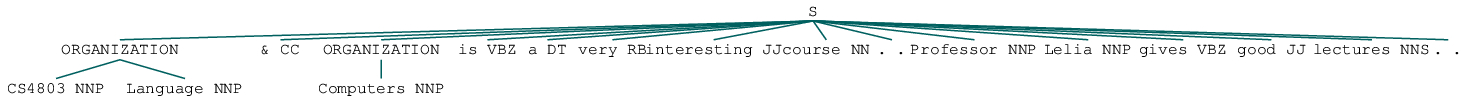

In [89]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities

In [2]:
# My second additional question
# Give the most frequent trigram in some texts and plot them. Try to find something interesting

In [3]:
from nltk.util import ngrams
def most_frequent_trigram(text):
    new_text = [word for word in text if word.isalpha()]
    trigrams = nltk.ngrams(new_text, 3)
    fdist = nltk.FreqDist(trigrams)
    fdist.plot(10)

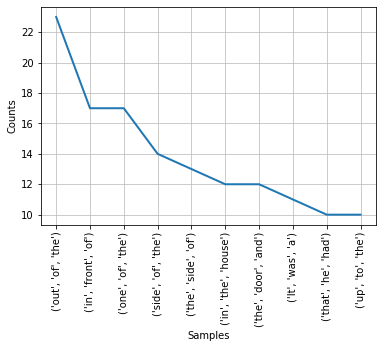

In [7]:
most_frequent_trigram(brown.words(categories='adventure'))

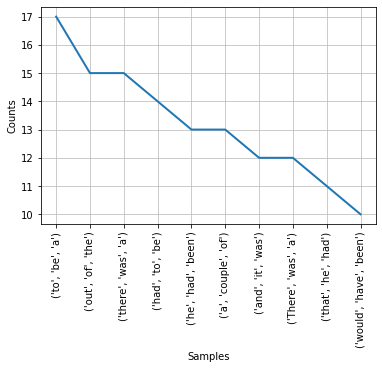

In [8]:
most_frequent_trigram(brown.words(categories='romance'))

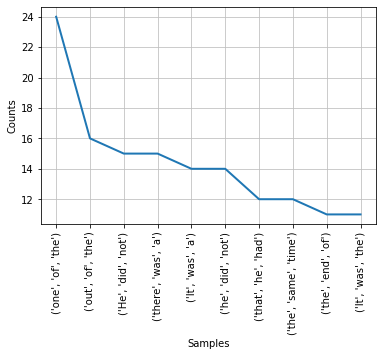

In [9]:
most_frequent_trigram(brown.words(categories='fiction'))

In [ ]:
# From the pictures above, we can find that the most frequent trigrams are phrases like, "one of the", "out of the", "it was a". 
# Phrases with the abundant information and meaning like "eat an apple" are not frequent.
# It's similar to the BBC statistic. Stop words or phrases with stop words are used more frequently.